<a href="https://www.kaggle.com/code/yorkyong/online-ad-click-eda?scriptVersionId=157191171" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Business Context**
Extracted from Data Card:

* This dataset is completely made up and meant for demonstration purposes only. 
* It contains 1000 fictitious samples, each with 8 features, designed to imitate how users might interact with online ads. 
* The main goal is to mimic a situation where a model predicts whether a user will click on an ad or not. 
* It's important to emphasize that this data doesn't represent real people or actual events.

# **Understanding the Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/kaggle/input/online-ad-click-prediction-dataset/adsclicking.csv')
df.head()

Unnamed: 0  Age  Gender  Income  Location  Device Interest_Category  \
0           0   56    Male   99003     Rural  Mobile            Sports   
1           1   46    Male   72395  Suburban  Tablet            Sports   
2           2   32    Male   59758  Suburban  Tablet            Sports   
3           3   60    Male   74312     Urban  Tablet        Technology   
4           4   25  Female   88670  Suburban  Mobile           Fashion   

   Time_Spent_on_Site  Number_of_Pages_Viewed  Click  
0           81.979324                       7      0  
1           59.854070                       3      1  
2           78.861989                       2      0  
3            9.411579                       6      0  
4           76.468409                       9      0

In [3]:
df.shape

(2000, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2000 non-null   int64  
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   Income                  2000 non-null   int64  
 4   Location                2000 non-null   object 
 5   Device                  2000 non-null   object 
 6   Interest_Category       2000 non-null   object 
 7   Time_Spent_on_Site      2000 non-null   float64
 8   Number_of_Pages_Viewed  2000 non-null   int64  
 9   Click                   2000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


Extracted from Data Card:

* **Age**: The age of the user, represented as an integer between 18 and 65.

* **Gender**: The gender of the user, categorized as either "Male" or "Female".

* **Income**: The annual income of the user, represented as an integer ranging from 20,000 to 100,000.

* **Location**: The location of the user, categorized as "Urban", "Suburban", or "Rural".

* **Device**: The device used by the user to access the online platform, categorized as "Desktop", "Mobile", or "Tablet".

* **Interest_Category**: The user's interest category, representing areas of interest such as "Technology", "Sports", "Fashion", or "Travel".

* **Time_Spent_on_Site**: The amount of time (in minutes) the user spent on the website or platform, represented as a floating-point number between 5 and 120.

* **Number_of_Pages_Viewed**: The number of pages viewed by the user during the session, represented as an integer between 1 and 20.

* **Click** (Target Variable): Binary variable indicating whether the user clicked on the ad (1) or did not click on the ad (0).

In [5]:
df.describe()

Unnamed: 0         Age        Income  Time_Spent_on_Site  \
count  2000.000000  2000.00000   2000.000000         2000.000000   
mean    999.500000    41.31650  59652.978500           61.113314   
std     577.494589    13.46566  23070.443915           32.518823   
min       0.000000    18.00000  20112.000000            5.006075   
25%     499.750000    30.00000  39873.750000           33.947635   
50%     999.500000    42.00000  59050.500000           60.378894   
75%    1499.250000    53.00000  79547.000000           88.321464   
max    1999.000000    64.00000  99943.000000          119.840992   

       Number_of_Pages_Viewed        Click  
count             2000.000000  2000.000000  
mean                10.321500     0.497000  
std                  5.476507     0.500116  
min                  1.000000     0.000000  
25%                  6.000000     0.000000  
50%                 10.000000     0.000000  
75%                 15.000000     1.000000  
max                 19.000000     1.000000

In [6]:
#shows as well for non-numeric fields
df.describe(include=['O'])

Gender  Location  Device Interest_Category
count     2000      2000    2000              2000
unique       2         3       3                 4
top     Female  Suburban  Mobile        Technology
freq      1014       688     688               556

# **Data Preparation**


In [7]:
df.isna().sum()

Unnamed: 0                0
Age                       0
Gender                    0
Income                    0
Location                  0
Device                    0
Interest_Category         0
Time_Spent_on_Site        0
Number_of_Pages_Viewed    0
Click                     0
dtype: int64

In [8]:
df.loc[df.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, Age, Gender, Income, Location, Device, Interest_Category, Time_Spent_on_Site, Number_of_Pages_Viewed, Click]
Index: []

* At the moment seems like there is no missing values or duplicated values
* As such no Data preparation steps is included at this stage

# **Feature Understanding**

In [9]:
df['Gender'].value_counts()

Gender
Female    1014
Male       986
Name: count, dtype: int64

In [10]:
df['Location'].value_counts()

Location
Suburban    688
Urban       659
Rural       653
Name: count, dtype: int64

In [11]:
df['Device'].value_counts()

Device
Mobile     688
Tablet     671
Desktop    641
Name: count, dtype: int64

In [12]:
df['Interest_Category'].value_counts()

Interest_Category
Technology    556
Sports        495
Travel        481
Fashion       468
Name: count, dtype: int64

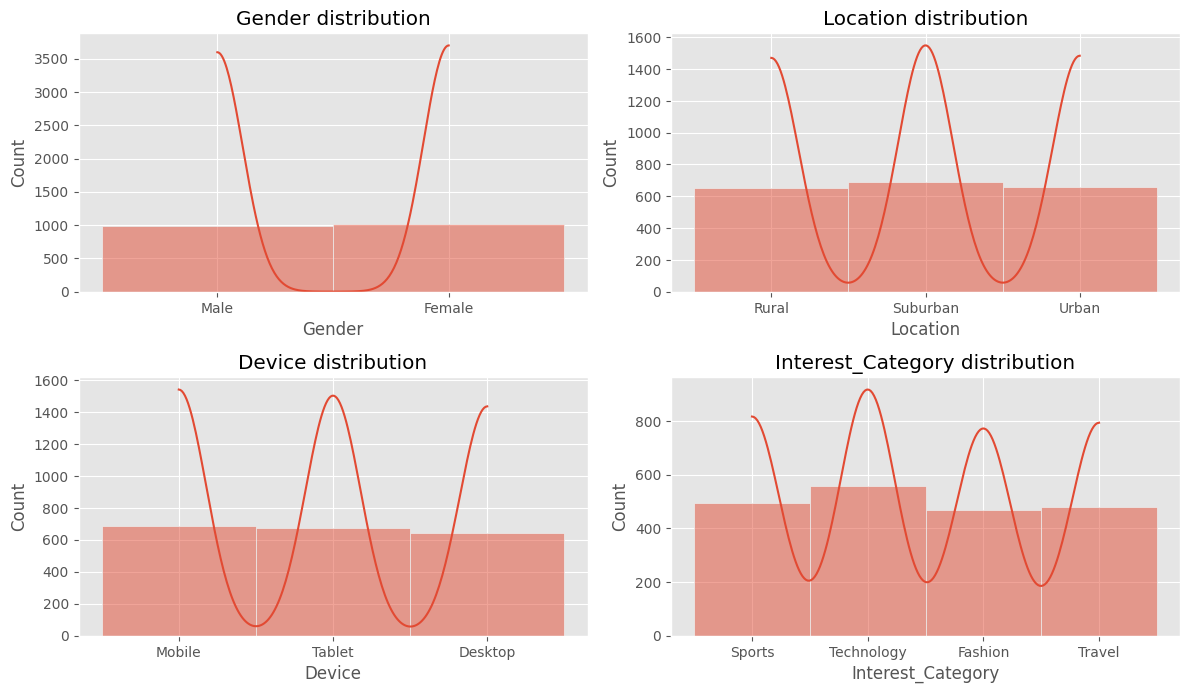

In [13]:
exp_cols = ["Gender","Location","Device","Interest_Category"]
plt.figure(figsize=(12,10))
for i, column in enumerate(exp_cols):
    plt.subplot(3,2, i+1)
    sns.histplot(data=df, x=column, kde=True, bins=30)
    plt.title(f'{column} distribution')
    plt.tight_layout()

* The data from the categorical features seems to be quite evenly balanced and spread between the categories.


# **Feature Relationships**

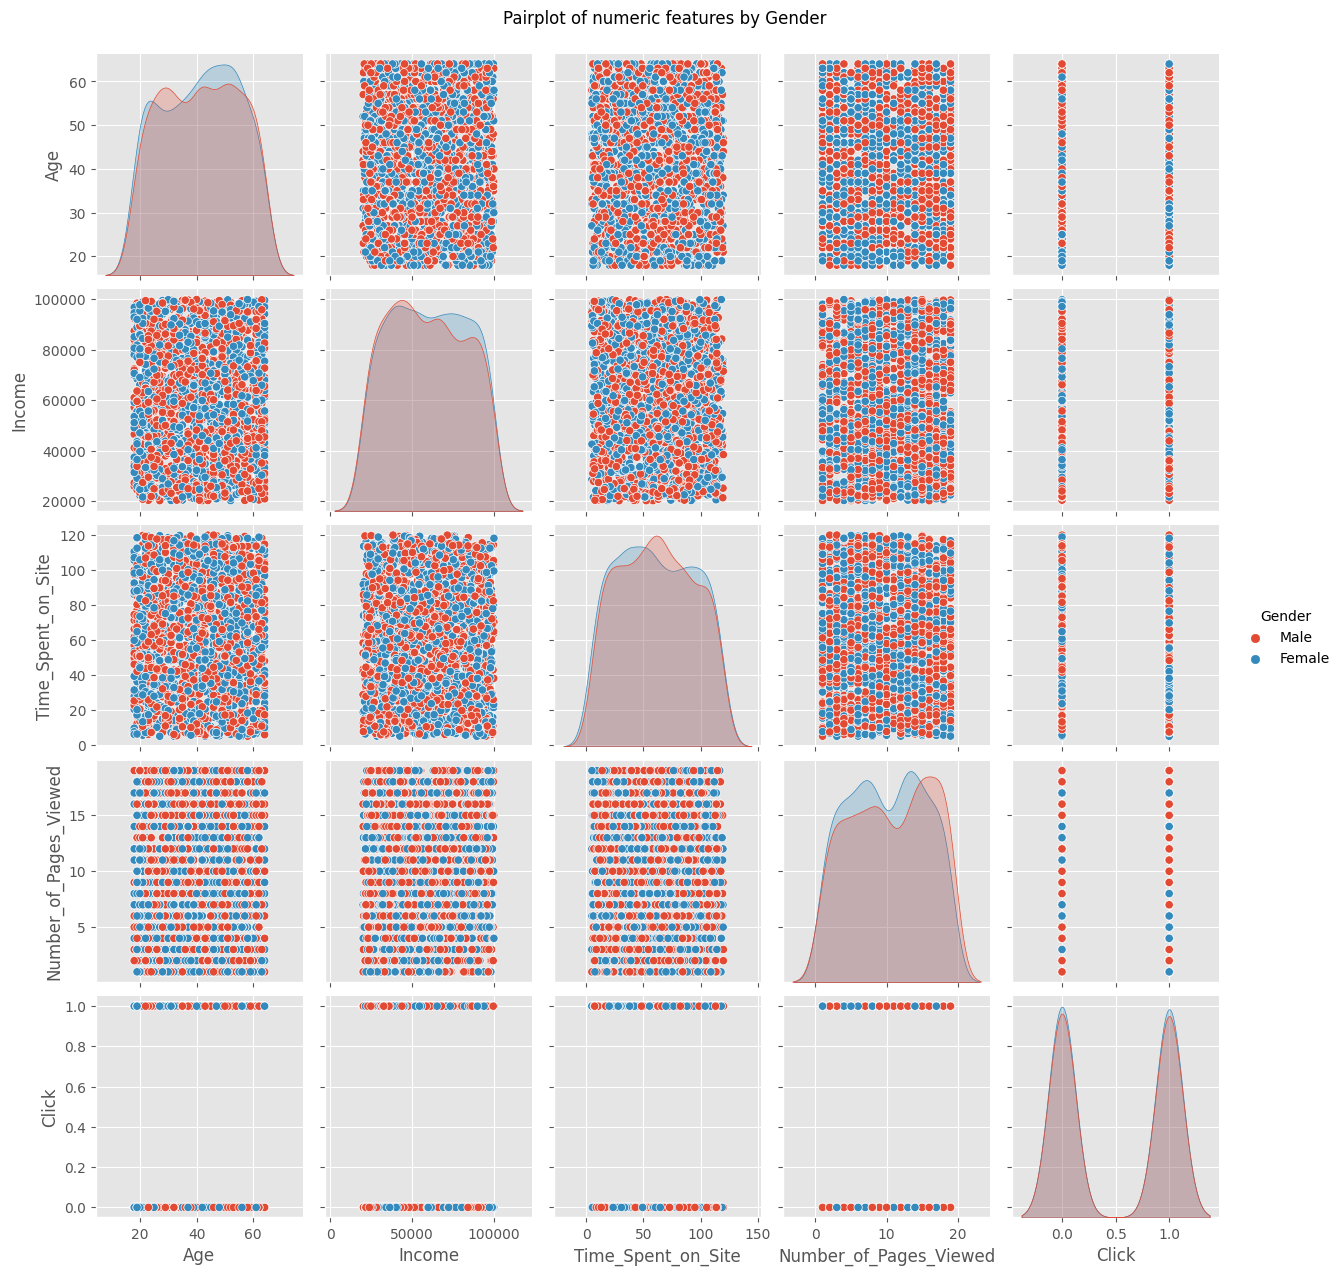

In [14]:
sns.pairplot(df,
             vars=['Age','Income','Time_Spent_on_Site','Number_of_Pages_Viewed','Click'],
             hue='Gender')
plt.suptitle('Pairplot of numeric features by Gender', y=1.02)
plt.show()

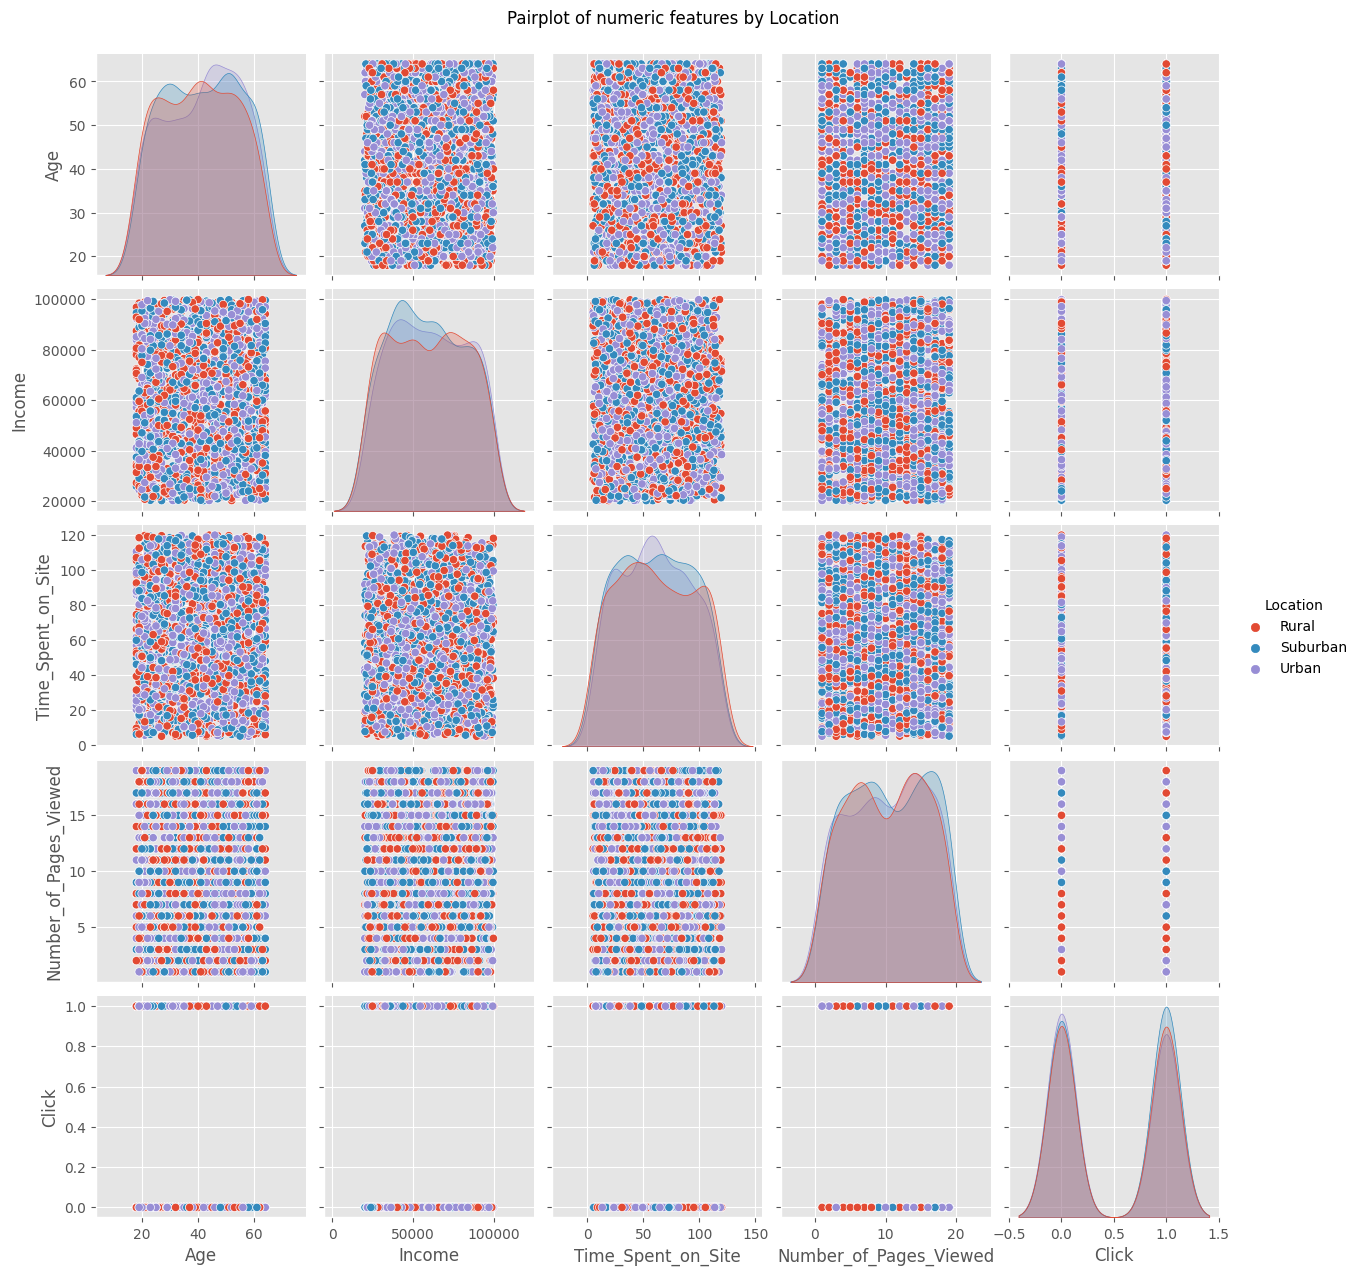

In [15]:
sns.pairplot(df,
             vars=['Age','Income','Time_Spent_on_Site','Number_of_Pages_Viewed','Click'],
             hue='Location')
plt.suptitle('Pairplot of numeric features by Location', y=1.02)
plt.show()

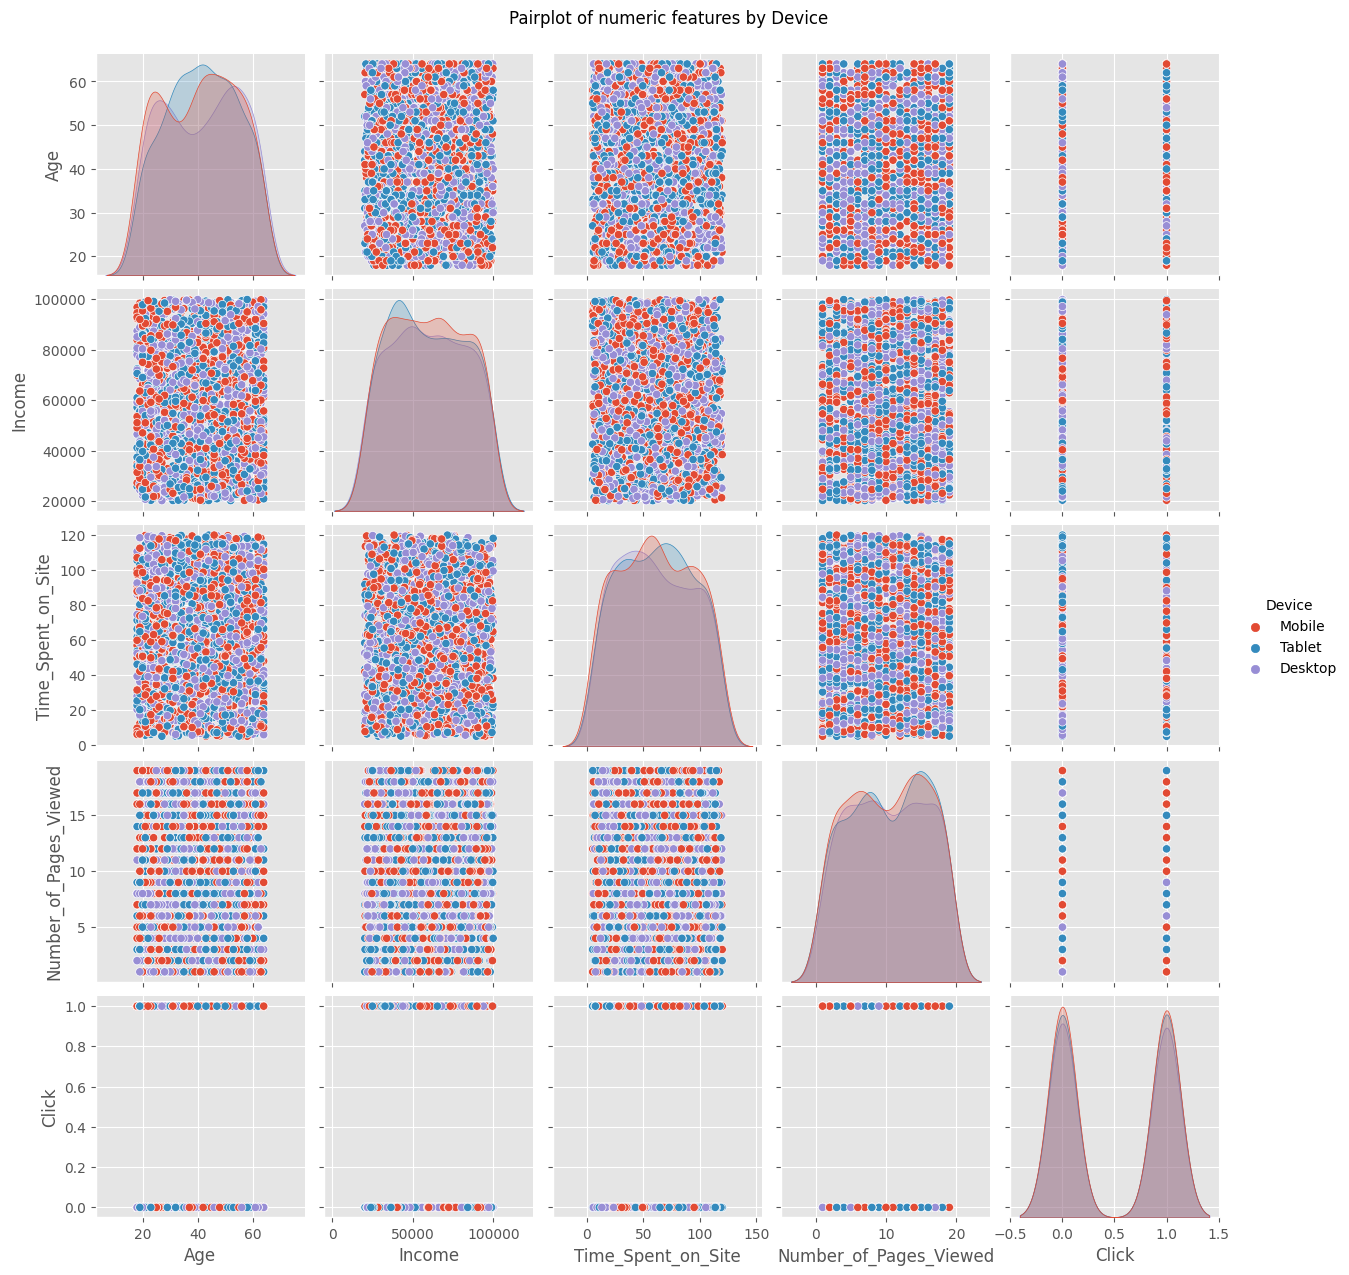

In [16]:
sns.pairplot(df,
             vars=['Age','Income','Time_Spent_on_Site','Number_of_Pages_Viewed','Click'],
             hue='Device')
plt.suptitle('Pairplot of numeric features by Device', y=1.02)
plt.show()

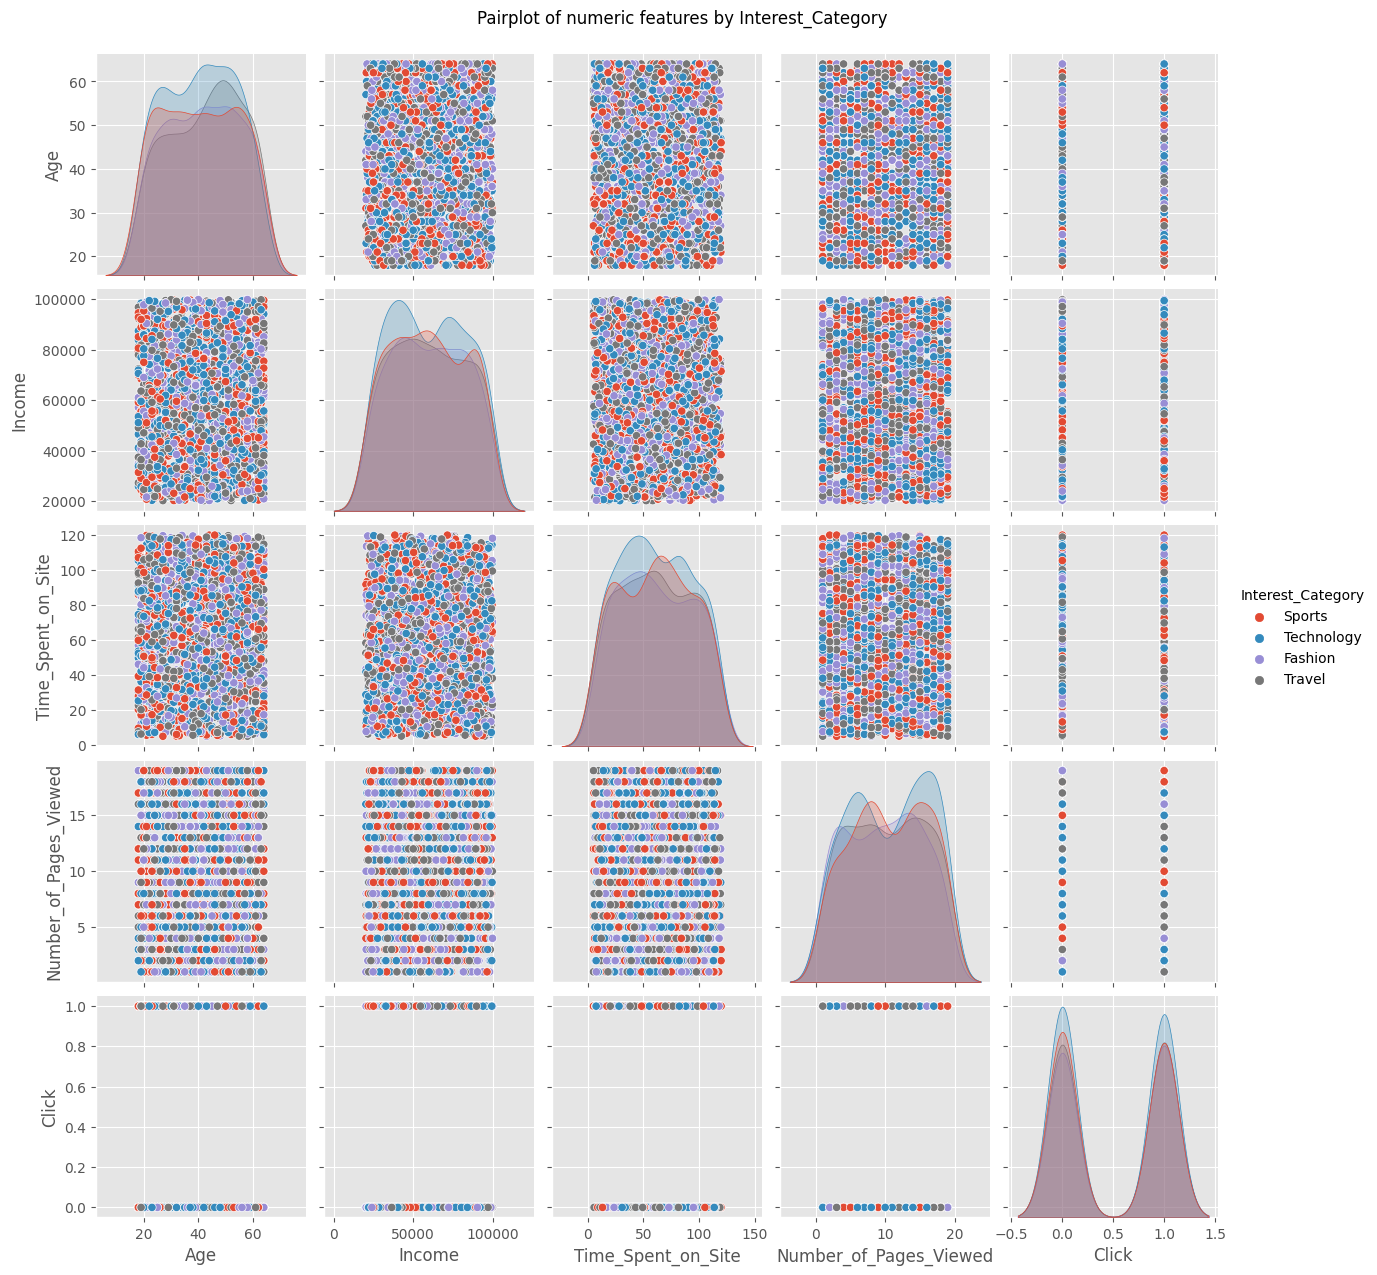

In [17]:
sns.pairplot(df,
             vars=['Age','Income','Time_Spent_on_Site','Number_of_Pages_Viewed','Click'],
             hue='Interest_Category')
plt.suptitle('Pairplot of numeric features by Interest_Category', y=1.02)
plt.show()

<Axes: >

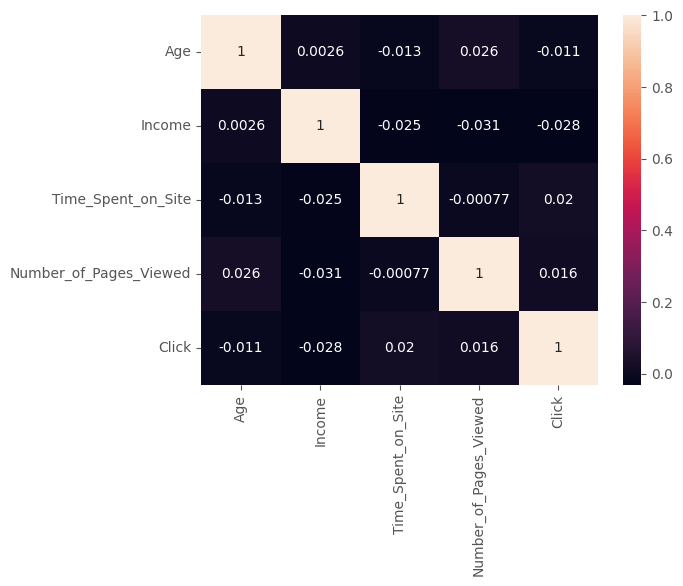

In [18]:
df_corr = df[['Age','Income','Time_Spent_on_Site','Number_of_Pages_Viewed','Click']].dropna().corr()
sns.heatmap(df_corr, annot=True)

* At this stage there is no observable patterns or relationships from the dataset as there is no clear relationship found in the pairplot and correlation analysis